In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('train.csv')

In [9]:
### Funciones Auxiliares ###

def densidad_plot_comparativo(df, tipos, columna, caracteristica):
    for col in tipos: 
        sns.distplot(df[df[columna] == col][caracteristica].dropna(), hist = False, label = col)
    plt.ylabel('Densidad')
    plt.title(f'Distribucion de {caracteristica} para diferentes tipos de propiedad')

# Distribucion de antiguedad

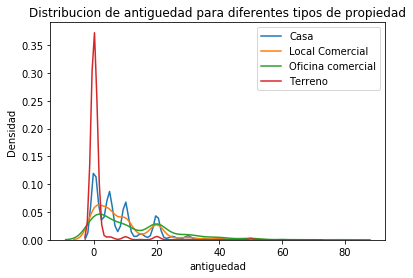

In [11]:
tipos_comunes.append('Terreno')
densidad_plot_comparativo(df, tipos_comunes, 'tipodepropiedad', 'antiguedad')
plt.savefig('./figs/distribucion_antiguedad_2.png')

### Se observa un pico en terrenos, se procede a graficar sin el para comparar mejor a los demas

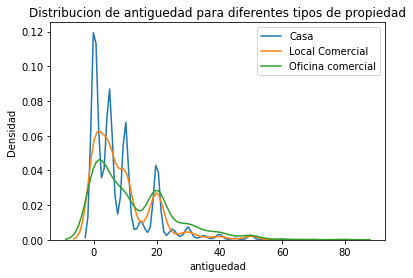

In [10]:
tipos_comunes = ['Casa', 'Local Comercial', 'Oficina comercial']
densidad_plot_comparativo(df, tipos_comunes, 'tipodepropiedad', 'antiguedad')
plt.savefig('./figs/distribucion_antiguedad_1.png')

# Distribucion de precios

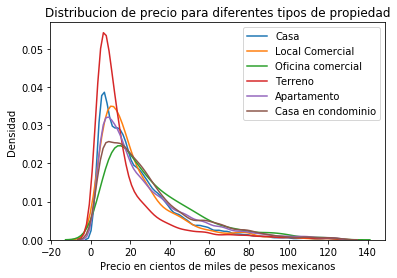

In [12]:
tipos_comunes.append('Apartamento')
tipos_comunes.append('Casa en condominio')
precios = df['precio'].copy()
df['precio'] = df['precio'].transform(lambda x:x/100000)
densidad_plot_comparativo(df, tipos_comunes, 'tipodepropiedad', 'precio')
df['precio'] = precios
plt.xlabel('Precio en cientos de miles de pesos mexicanos')
plt.savefig('./figs/distribucion_precios.png')
plt.show()

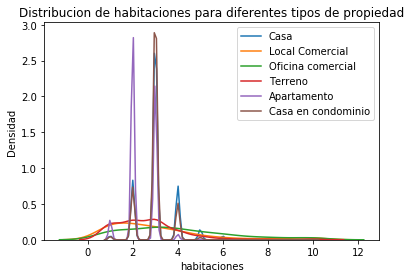

In [14]:
tipos_residenciales = ['Casa', 'Apartamento', 'Casa en condominio', 'Edificio']
densidad_plot_comparativo(df, tipos_comunes, 'tipodepropiedad', 'habitaciones')

### Horrible, hay que sacarlo ###

Text(0.5, 1, 'Relacion habitaciones / banos')

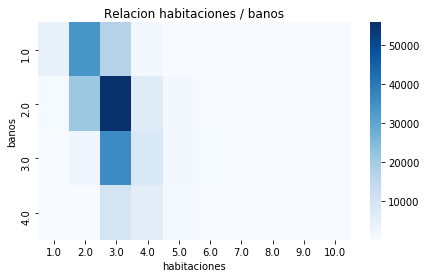

In [51]:
habitaciones_banos = df.groupby(['habitaciones', 'banos']).agg({'id':'count'})
habitaciones_banos.rename(columns = {'id':'cantidad'}, inplace=True)
habitaciones_banos = habitaciones_banos.\
                                        reset_index()\
                                        .pivot(index="habitaciones", columns = "banos", values = "cantidad")

plt.figure(figsize = (7,4))
ax = sns.heatmap(habitaciones_banos.T, cmap="Blues")
ax.set_ylim(4.0, 0)
plt.title('Relacion habitaciones / banos')